In [1]:
import sys
# Add the parent directory to the system path
sys.path.insert(1, r"C:\Users\sk88\Documents\Python")

# import the relevant class
from Thorlabs.PM100.PM100 import PM100 

In [2]:
# initialise the device
PM_1 = PM100()
PM_2 = PM100()

In [3]:
PM_1.initialise(device='USB0::0x1313::0x8078::P0024956::INSTR')
PM_2.initialise(device='USB0::0x1313::0x8079::P1005423::INSTR')

Connection to device USB0::0x1313::0x8078::P0024956::INSTR succesful!
Connection to device USB0::0x1313::0x8079::P1005423::INSTR succesful!


In [4]:
PM_1.set_units('mW')
PM_1.set_bandwidth('high')
PM_1.set_wavelength(995)
PM_2.set_units('mW')
PM_2.set_bandwidth('high')
PM_2.set_wavelength(995)

Units set to mW
bandwidth set to high
Units set to mW
bandwidth set to high


In [5]:
from time import sleep
PM_1.verbose = False
PM_2.verbose = False

In [15]:
x_1 = []
x_2 = []
time = []
index = range(0, 100)
for i in index:
    x_1.append(PM_1.measure())
    x_2.append(PM_2.measure())
    sleep(1)
    time.append(i)

Text(0.02, 0.5, 'Normalised Power')

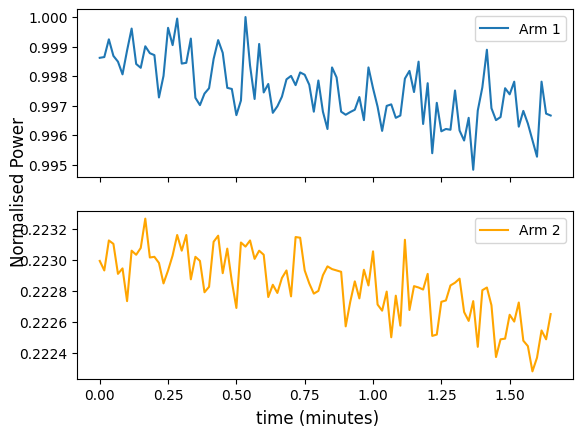

In [16]:
import matplotlib.pyplot as mp
a = max(x_2)
x_3 = [x/a for x in x_1]
x_4 = [x/a for x in x_2]
hours = [x/60 for x in time]

fig, ax = mp.subplots(nrows=2, sharex=True)

ax[0].plot(hours, x_4, label='Arm 1')
ax[1].plot(hours, x_3, label='Arm 2', color='orange')
ax[0].legend()
ax[1].legend()
fig.supxlabel('time (minutes)')
fig.supylabel('Normalised Power')


In [17]:
from Function_files import data_functions as dat
dat.write_json('995_IP_3', [time, x_1, x_2])